<a href="https://colab.research.google.com/github/ritikraj660/Image_Denoising/blob/master/image_denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Referance

Image Denoising with Deep Convolutional Neural Networks[https://web.stanford.edu/class/cs331b/2016/projects/zhao.pdf], used this paper model's for implementing image denosing algorithm using CNN2D.

# Importing package & Data

In [ ]:
# Plot ad hoc CIFAR10 instances
from keras.datasets import cifar10

import random
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Add, AveragePooling2D
import keras
from keras.models import Model
from keras import backend as K
from google.colab.patches import cv2_imshow


# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# create a grid of 3x3 images


In [ ]:
print("Shape of training data =  {}, shape of test data = {}".format(X_train.shape,X_test.shape))

Shape of training data =  (50000, 32, 32, 3), shape of test data = (10000, 32, 32, 3)


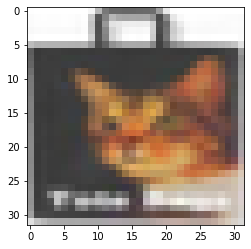

In [ ]:
j = X_train[3000]
plt.imshow(j)
plt.show()

# Pre-processing & Adding Gaussian Noise

In [ ]:
x_train = X_train.astype('float32') / 255.
x_test = X_test.astype('float32') / 255.


print("x_train shape = {}".format(x_train.shape))
print("x_test shape = {}".format(x_test.shape))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


print("*******************************************")
print("x_train_noisy shape = {}".format(x_train_noisy.shape))
print("x_test_noisy shape = {}".format(x_test_noisy.shape))

x_train shape = (50000, 32, 32, 3)
x_test shape = (10000, 32, 32, 3)
*******************************************
x_train_noisy shape = (50000, 32, 32, 3)
x_test_noisy shape = (10000, 32, 32, 3)


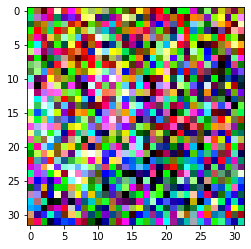

In [ ]:
j = x_test_noisy[0]
plt.imshow(j)
plt.show()

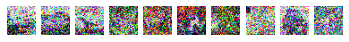

In [ ]:
def plot_(image):
  plt.figure(figsize=(1,2))
  plt.imshow(image)
  plt.show()

n = 10
for i in range(1,n+1):
  #plt.figure(figsize=(2,20))
  plt.subplot(1,n,i)
  #plot_(x_test_noisy[i])
  plt.imshow(x_test_noisy[i])
  plt.axis(False)
plt.show()


# Image Denoising Model

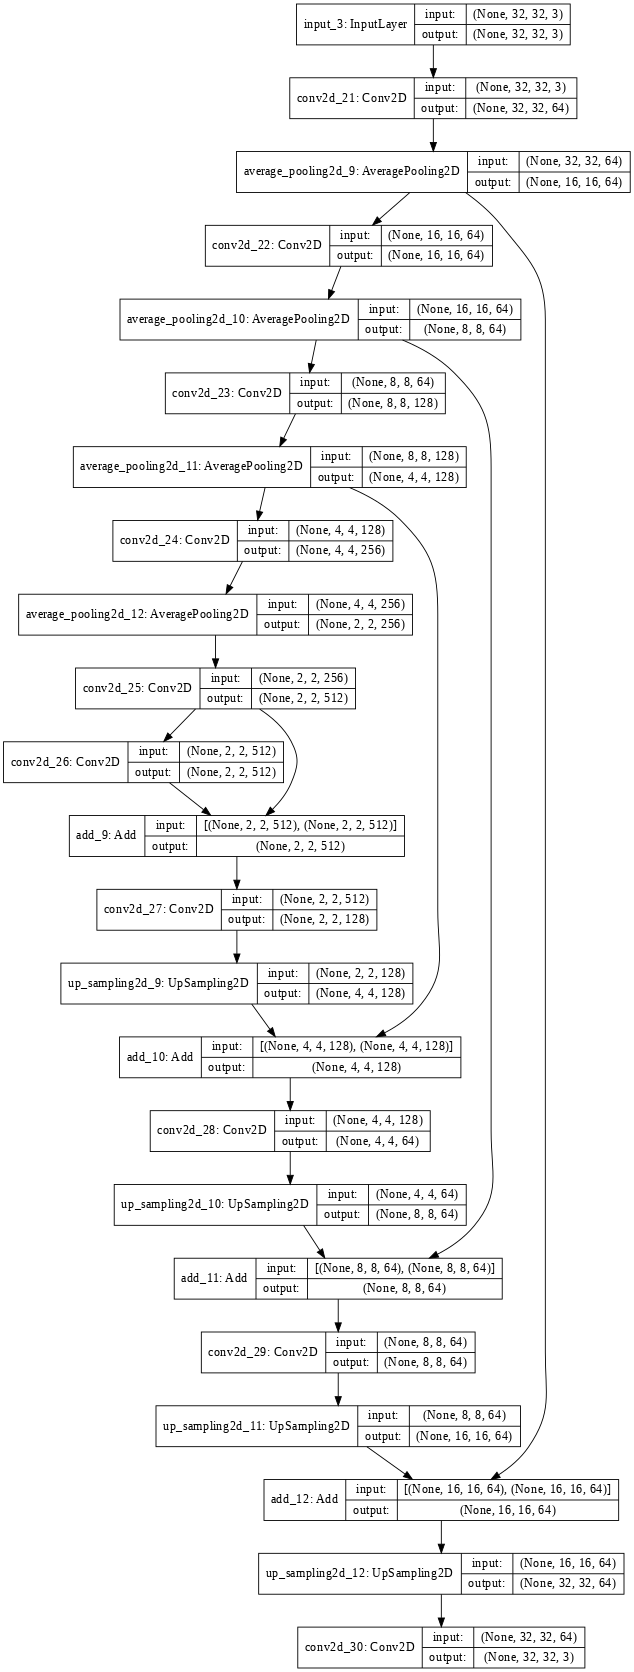

In [ ]:
input_img = Input(shape=(32,32, 3))  # adapt this if using `channels_first` image data format

x1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x1 = AveragePooling2D((2, 2), padding='same')(x1)

x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x1)
x2 = AveragePooling2D((2, 2), padding='same')(x2)

x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(x2)
x3 = AveragePooling2D((2, 2), padding='same')(x3)

x4 = Conv2D(256, (3, 3), activation='relu', padding='same')(x3)
x4 = AveragePooling2D((2, 2), padding='same')(x4)

x5 = Conv2D(512, (3, 3), activation='relu', padding='same')(x4)
#x5 = MaxPooling2D((2, 2), padding='same')(x5)

y1 = Conv2D(512, (3, 3), activation='relu', padding='same')(x5)
#y1 = UpSampling2D((2, 2))(y1)
y1 = Add()([y1,x5])

y2 = Conv2D(128, (3, 3), activation='relu', padding='same')(y1)
y2 = UpSampling2D((2, 2))(y2)
y2 = Add()([y2,x3])

y3 = Conv2D(64, (3, 3), activation='relu', padding='same')(y2)
y3 = UpSampling2D((2, 2))(y3)
y3 = Add()([y3,x2])

y4 = Conv2D(64, (3, 3), activation='relu', padding='same')(y3)
y4 = UpSampling2D((2, 2))(y4)
y4 = Add()([y4,x1])

y5 = UpSampling2D((2, 2))(y4)
y5 = Conv2D(3, (3, 3), activation='relu', padding='same')(y5)
#y5 = UpSampling2D((2, 2))(y5)

autoencoder = Model(input_img, y5)         #   mean_squared_error binary_crossentropy
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
#autoencoder.summary()

keras.utils.plot_model(autoencoder, to_file='model.png', show_shapes=True, show_layer_names=True,
                                  rankdir='TB', expand_nested=True, dpi=64)

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                verbose=0,
                validation_data=(x_test_noisy, x_test))

In [ ]:
decoded_imgs = autoencoder.predict(x_test_noisy)
#decoded_imgs = np.clip(decoded_imgs, 0, 255)

# Result plot

Result are as follow :

Image from dataset -> Noisy Image -> Denoised Image

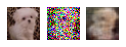

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


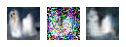

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


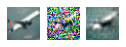

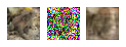

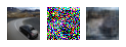

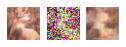

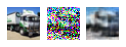

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


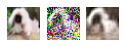

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


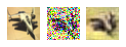

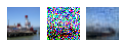

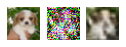

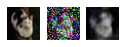

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


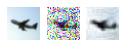

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


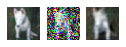

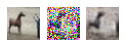

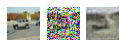

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


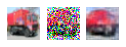

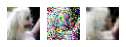

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


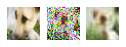

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


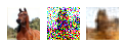

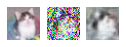

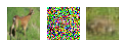

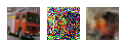

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


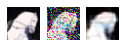

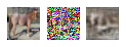

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


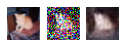

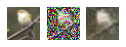

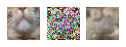

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


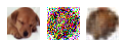

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


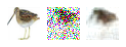

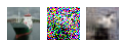

In [ ]:
def plot_(image,image1,image2):
  plt.figure(figsize=(2,6))
  plt.subplot(1,3,1)
  plt.imshow(image)
  plt.axis(False)
  plt.subplot(1,3,2)
  plt.imshow(image1)
  plt.axis(False)
  plt.subplot(1,3,3)
  plt.imshow(image2)  
  plt.axis(False)
  
  plt.show()


n = 30
for i in range(n+1):
  i = np.random.randint(0,9999)
  plot_(x_test[i],x_test_noisy[i],decoded_imgs[i])